In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Polinomiale_IN.csv'
INPUT_df = pd.read_csv(path)

In [3]:
INPUT_df.head()

,Superficie,Prezzo
0,60,338611
1,70,655033
2,140,5697001
3,150,7011305
4,79,534887


In [4]:
INPUT_df.shape

(108, 2)

In [5]:
# remove nan values

INPUT_df = INPUT_df.dropna(1, "all") #remove rows
INPUT_df = INPUT_df.dropna(0, "all") #remove columns

In [6]:
# convert to numpy arrays

np_IN = np.array(INPUT_df)

In [7]:
# split into features and target columns

np_IN_X = np_IN[:,0]
np_IN_y = np_IN[:,1]

In [8]:
np_IN_X.shape

(108,)

In [9]:
np_IN_y.shape

(108,)

C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


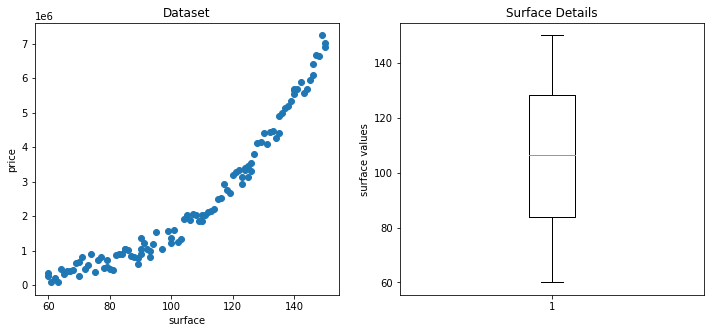

In [10]:
# plot data

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].scatter(np_IN_X, np_IN_y)
axs[0].set_xlabel("surface")
axs[0].set_ylabel("price")
axs[0].set_title("Dataset")
axs[1].boxplot(np_IN_X)
axs[1].set_ylabel("surface values")
axs[1].set_title("Surface Details")
fig.show()

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [11]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)

<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

### Linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


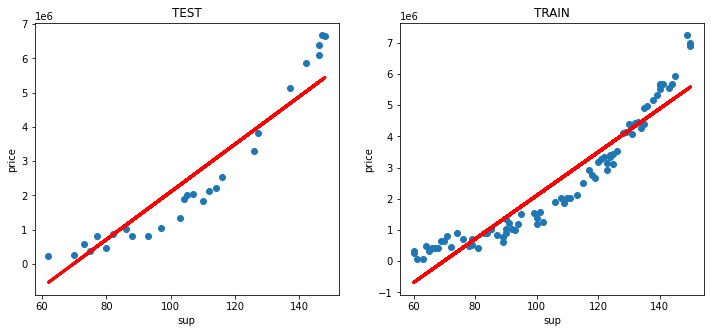

In [13]:
# reshape features to be used with LinearRegression's methods

X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))
X_all=np.reshape(np_IN_X,(-1,1))

# train the linear regressor

reg = LinearRegression().fit(X_train_r, y_train)

# predict using fitted model

y_pred_test=reg.predict(X_test_r)
y_pred_train=reg.predict(X_train_r)

# plot the solution

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)
axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].plot(X_test,y_pred_test,c='red',linewidth=3)
axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup')
axs[1].set_ylabel('price')
axs[1].scatter(X_train,y_train)
axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)
fig.show()

### Support vector regressor model

In [14]:
from sklearn.svm import SVR

RBF MODEL
Test
r^2= -0.07620930114832092 
mse= 4971347790399.922852
Train
r^2= -0.094904387641221 
mse= 4217551306064.980469 

Linear MODEL
Test
r^2= -0.03239753825127778 
mse= 4768967537377.258789
Train
r^2= -0.04616245645232597 
mse= 4029798295056.666504 

Polynomial MODEL
Test
r^2= 0.9671544805356417 
mse= 151723740390.877563
Train
r^2= 0.9645696924719622 
mse= 136476884626.499588 



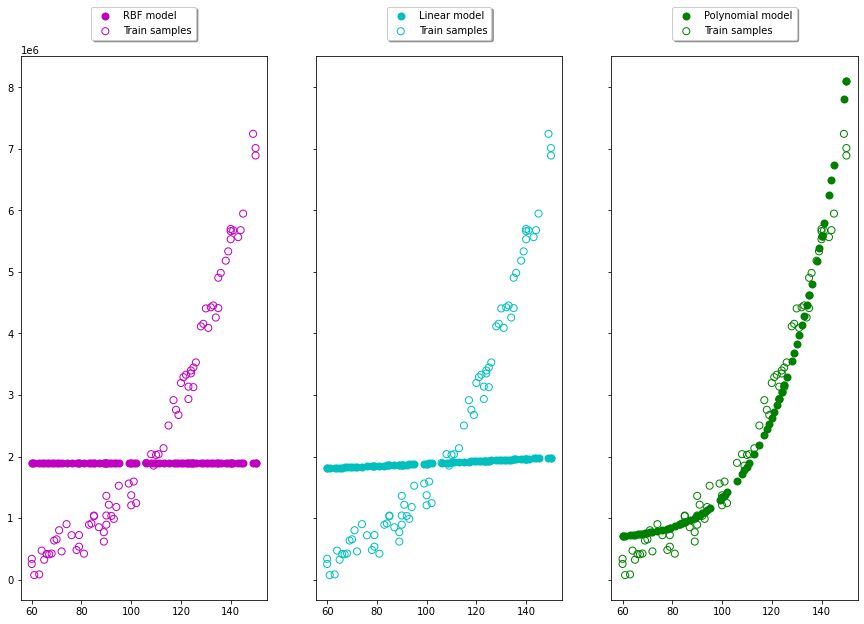

In [15]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=6)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
for ind, svr in enumerate(svrs):
    svr.fit(X_train_r, y_train)
    axes[ind].scatter(X_train_r, svr.predict(X_train_r), 
                      color=model_color[ind], 
                      lw=2,
                      label='{} model'.format(kernel_label[ind]))
    axes[ind].scatter(X_train_r,y_train,
                      facecolor="none",
                      edgecolor=model_color[ind], 
                      s=50,
                      label='Train samples')
    axes[ind].legend(loc='upper center', 
                     bbox_to_anchor=(0.5, 1.1),
                     ncol=1, 
                     fancybox=True, 
                     shadow=True)
    R2_test=svr.score(X_test_r,y_test)
    MSE_test = mean_squared_error(y_test,svr.predict(X_test_r))
    R2_train=svr.score(X_train_r,y_train)
    MSE_train = mean_squared_error(y_train,svr.predict(X_train_r))
    
    print (kernel_label[ind], 'MODEL', )
    print ('Test\nr^2=',R2_test,'\nmse= %f' % MSE_test)
    print ('Train\nr^2=',R2_train,'\nmse= %f '% MSE_train)
    print ('')